# Exploring Seattle Airbnb's Prices, Fees and season.
##### This points will be explored in this notebook following the CRISP-DM structure:

1) Business Understanding

2) Data Understanding

3) Prepare data

4) Data modelling

5) Evaluate the results

## Business Understanding
##### In order to have some insights about prices, fees and season. I will explore the following four questions:

- What are the neighborhoods with the best prices?

- What type of property has the best prices ?

- What to expect in terms of cleaning fee and how much it increases the price on average?

- When are high seasons and low seasons ?

## Data Understanding

### Dataset
- Seattle AirBnB and many others datasets available at this link: http://insideairbnb.com/get-the-data.html
- For this notebook, it was used the seattle dataset '17 January, 2019'.

In [22]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

# Settings pandas to visualize all columns
pd.set_option('display.max_columns', 106)

In [23]:
# Import data
calendar = pd.read_csv("./seattle/calendar.csv")
listings = pd.read_csv("./seattle/listings.csv")

c:\users\paulobueno\pycharmprojects\udacity_geral\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Functions Used Through the Analysis:

In [24]:
def fix_price(item):
    ''' 
    The function will remove the "$" symbol from the given item and convert to float type. However if 'item' is NaN it will return np.nan
    '''
    x = item
    if(isinstance(x, str)):
        if "$" in x:
            x = x.replace("$", '')
            x = x.replace(",", '')
            x = float(x)
        
    return x


def mean_median_grouped_price(dataframe, column_name, outlier=False):
    """
    Takes dataframe and column 
    return: mean and median groupped by the column name given.
    
    optional: turn 'outlier' param True to filter outliers in dataframe
    """
    
    price_std = dataframe['price'].std()
    
    if outlier:
        #Filtering Price Outliers
        filt = dataframe['price'] <= (dataframe['price'] + (price_std * 3))
        dataframe = dataframe.loc[filt]
        filt = dataframe['price'] >= (dataframe['price'] - (price_std * 3))
        dataframe = dataframe.loc[filt]
    
    # Getting the mean price for each neighbourhood: Price and cleaning fee
    neighbourhood_mean = pd.DataFrame()
    neighbourhood_mean['mean_price'] = dataframe.groupby(listings_neighbourhood[column_name])['price'].mean()
    neighbourhood_mean['mean_fee'] = dataframe.groupby(listings_neighbourhood[column_name])['cleaning_fee'].mean()

    # Getting the median price for each neighbourhood: Normal price and price with cleaning fee
    neighbourhood_median = pd.DataFrame()
    neighbourhood_median['median_price'] = dataframe.groupby(listings_neighbourhood[column_name])['price'].median()
    neighbourhood_median['median_fee'] = dataframe.groupby(listings_neighbourhood[column_name])['cleaning_fee'].median()
    
    return neighbourhood_mean.sort_values(by = 'mean_price'), neighbourhood_median.sort_values(by = 'median_price')


def plot_head_tail_prices(mean_or_median, m_type, column_name):
    """
    Input:
        mean_or_median: groupped dataframe by the column name
        m_type: string with 'mean' or 'median'
        column_name: column used to group dataframe
    output:
        plot mean prices and cleaning fee
    """
    
    # Plotting Highest and Lowest Prices with metric type chosen
    fig = plt.figure(constrained_layout=True)
    
    
    if m_type == 'mean':
        if column_name.split('_')[1] != 'cleansed':
            plot_title1 = f"Highest 5 Price Means - {column_name.replace('_',' ').title()}"
            plot_title2 = f"Lowerest 5 Price Means - {column_name.replace('_',' ').title()}"
        else:
            plot_title1 = f"Highest 5 Price Means - {column_name.split('_')[0].title()}"
            plot_title2 = f"Lowerest 5 Price Means - {column_name.split('_')[0].title()}"
        
    elif m_type == 'median':
        plot_title1 = f"Highest 5 Price Medians - {column_name.replace('_',' ').title()}"
        plot_title2 = f"Lowest 5 Price Medians - {column_name.replace('_',' ').title()}"
        

    spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)
    
    # Setting ax1
    ax1 = fig.add_subplot(spec2[0, 0])
    mean_or_median.tail(5).sort_values(by='mean_price', ascending=False).plot(kind = 'bar',figsize = (10,10), title=plot_title1, ax=ax1, cmap='autumn', alpha=0.5 , rot=0)
    ax1.legend(['Price($)', 'Cleaning Fee ($)'],loc='lower right')
    ax1.title.set_size(20)

    for p in ax1.patches:
        ax1.annotate(f"{p.get_height():.2f}", (p.get_x() * 1.005, p.get_height() * 1.005))
         
    # Setting ax2
    ax2 = fig.add_subplot(spec2[1, 0])
    mean_or_median.head(5).plot(kind = 'bar',figsize = (10,10), title=plot_title2, ax=ax2, cmap='winter', alpha=0.5 , rot=0)
    ax2.legend(['Price($)', 'Cleaning Fee ($)'],loc='lower right')
    ax2.title.set_size(20)

    for p in ax2.patches:
        ax2.annotate(f"{p.get_height():.2f}", (p.get_x() * 1.005, p.get_height() * 1.005))      
        

### Exploring Calendar Dataset

In [25]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2019-01-17,f,$250.00,$250.00,4,300
1,2318,2019-01-18,f,$250.00,$250.00,4,300
2,2318,2019-01-19,t,$250.00,$250.00,4,300
3,2318,2019-01-20,t,$250.00,$250.00,4,300
4,2318,2019-01-21,t,$250.00,$250.00,4,300


### Exploring Listing Dataset

In [26]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190117134415,2019-01-17,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,four day minimum stay,NaN,NaN,https://a0.muscache.com/im/pictures/ac08892c-f...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/55737...,https://a0.muscache.com/im/pictures/user/55737...,Minor,3,3,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122.0,Seattle,"Seattle, WA",US,United States,47.610819,-122.290816,t,House,Entire home/apt,8,2.5,4,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$200.00,8,$25.00,4,300,4,4,300,300,4.0,300.0,today,t,28,58,83,358,2019-01-17,21,10,2008-09-15,2018-11-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,{WASHINGTON},t,f,strict_14_with_grace_period,f,f,3,2,1,0,0.17
1,3335,https://www.airbnb.com/rooms/3335,20190117134415,2019-01-17,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,"Light rail is walking distance, bus lines are ...","Laundry, wifi, huge covered back porch and gri...",We live in the house next door and like to han...,No smoking in house or gardens (except for the...,NaN,NaN,https://a0.muscache.com/im/pictures/76027692/e...,NaN,4193,https://www.airbnb.com/users/show/4193,Jessica,2008-11-10,"Seattle, Washington, United States","Hello! I am an avid gardener, community organ...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/4193/profile_...,https://a0.muscache.com/im/users/4193/p

#### The business questions focus on the following attributes which are available in the corresponding datasets:

1. Price - listings dataset

2. Cleaning Fee - listings dataset

3. Property Type - listings dataset

4. Neighbourhood - listings dataset

5. Price Over Time (Season) - calendar dataset

# Prepare Data

### Preparing Calendar Dataset

In [27]:
# Converting 'available' column string data into Boolean data
calendar['available'] = calendar['available'] == "t"

# Converting prices to floats
calendar['price'] = calendar['price'].apply(lambda x: fix_price(x))
calendar['adjusted_price'] = calendar['adjusted_price'].apply(lambda x: fix_price(x))

calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2019-01-17,False,250.0,250.0,4,300
1,2318,2019-01-18,False,250.0,250.0,4,300
2,2318,2019-01-19,True,250.0,250.0,4,300
3,2318,2019-01-20,True,250.0,250.0,4,300
4,2318,2019-01-21,True,250.0,250.0,4,300


### Preparing Listings Dataset
- Filling NA values, 
- Converting monetary string to float
- Transforming and fixing strings

There are more than 90 features that are present but to understand prices by property types, neighbourhood and the impact of cleaning fee we will need only:
1. 'id', 
2. 'property_type', 
3. 'room_type', 
4. 'neighbourhood_cleansed',
5. 'price' and 
6. 'cleaning_fee'

In [28]:
# Selecting columns for analysis
chosen_columns = ['id', 'property_type', 'room_type', 'neighbourhood_cleansed','price','cleaning_fee',]

listings = listings[chosen_columns]

In [29]:
listings.info()
print('-'*50)
print('Missing Values')
print('-'*50)
listings.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8483 entries, 0 to 8482
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      8483 non-null   int64 
 1   property_type           8483 non-null   object
 2   room_type               8483 non-null   object
 3   neighbourhood_cleansed  8483 non-null   object
 4   price                   8483 non-null   object
 5   cleaning_fee            7531 non-null   object
dtypes: int64(1), object(5)
memory usage: 397.8+ KB
--------------------------------------------------
Missing Values
--------------------------------------------------


id                          0
property_type               0
room_type                   0
neighbourhood_cleansed      0
price                       0
cleaning_fee              952
dtype: int64

In [30]:
# Converting and fixing price string to float
listings['price'] = listings['price'].apply(lambda x: fix_price(x))
listings['cleaning_fee'] = listings['cleaning_fee'].apply(lambda x: fix_price(x))

# Checking types again
listings.dtypes

id                          int64
property_type              object
room_type                  object
neighbourhood_cleansed     object
price                     float64
cleaning_fee              float64
dtype: object

In [31]:
# Filling Prices NA
listings['cleaning_fee'].fillna(0, inplace=True)

I will assume that if it is not declared it is because there is no cleaning fee.

In [32]:
# Confirming if there isn't null data
obj = listings.isnull().sum()
print(f"{'Null Values':>22}")
for key,value in obj.iteritems():
    print(f'{key:>22}   {value:^5}')

           Null Values
                    id     0  
         property_type     0  
             room_type     0  
neighbourhood_cleansed     0  
                 price     0  
          cleaning_fee     0  


##### Looking into listings data after preparing

In [20]:
listings.head()

,id,property_type,room_type,neighbourhood_cleansed,price,cleaning_fee
0,2318,House,Entire home/apt,Madrona,296.0,200.0
1,3335,Other,Entire home/apt,Dunlap,120.0,75.0
2,4291,House,Private room,Roosevelt,82.0,30.0
3,5682,Guest suite,Entire home/apt,South Delridge,48.0,45.0
4,6606,Apartment,Entire home/apt,Wallingford,90.0,40.0


#### Property and Room Type Count

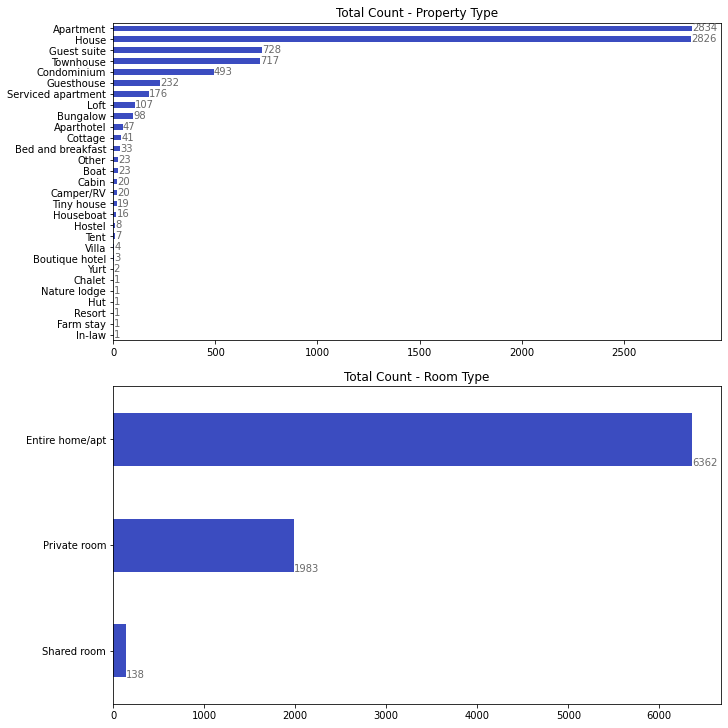

In [33]:
# Lets analyse the listing by different Property Type
def plot_value (col,df,x=10,y=2, ax=None, title=None):
    """
    Takes a dataframe and column name and plot the count of values at that column.
    input: dataframe, column name
    output: plot horizontal bar chart
    """
    if ax:
        df[col].value_counts().sort_values().plot(kind = 'barh' , figsize = (x,y), ax=ax, title=title, cmap='coolwarm');
        for i in ax.patches:
            # get_width pulls left or right; get_y pushes up or down
            ax.text(i.get_width()+1, i.get_y(), \
                    f"{int(i.get_width())}", fontsize=10, color='dimgrey')
    else:
        df[col].value_counts().sort_values().plot(kind = 'barh' , figsize = (x,y), cmap='coolwarm');
        
def get_indexes_property_types(df, col): return df[col].value_counts().sort_values()[-10:].index.to_list()
    
    
    

# Set up the figure
fig = plt.figure(constrained_layout=True)

spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0])
ax2 = fig.add_subplot(spec2[1, 0])



plot_value ('room_type', df=listings, y=3,ax=ax2, title="Total Count - Room Type")
plot_value ('property_type', df=listings, y=10, ax=ax1, title="Total Count - Property Type")


For the purpose of this notebook it will be taken the ten highest counts

In [34]:
# Selecting the ten most frequent property types
property_type_list = get_indexes_property_types(listings, 'property_type')

##### Filtering by Property Type

In [36]:
listings_neighbourhood = listings.copy(deep=True)

# Filtering
filt = listings_neighbourhood['property_type'].isin(property_type_list)
listings_neighbourhood = listings_neighbourhood[filt]

# Results

## 1. What are the neighborhoods with the best prices?

In [37]:
# Getting Mean Price by Neighbourhood
mean_price, median_price = mean_median_grouped_price(listings_neighbourhood, column_name='neighbourhood_cleansed')

#### Neighbourhoods Mean Prices:
- Higher 5 Mean Prices
- Lowest 5 Mean Prices

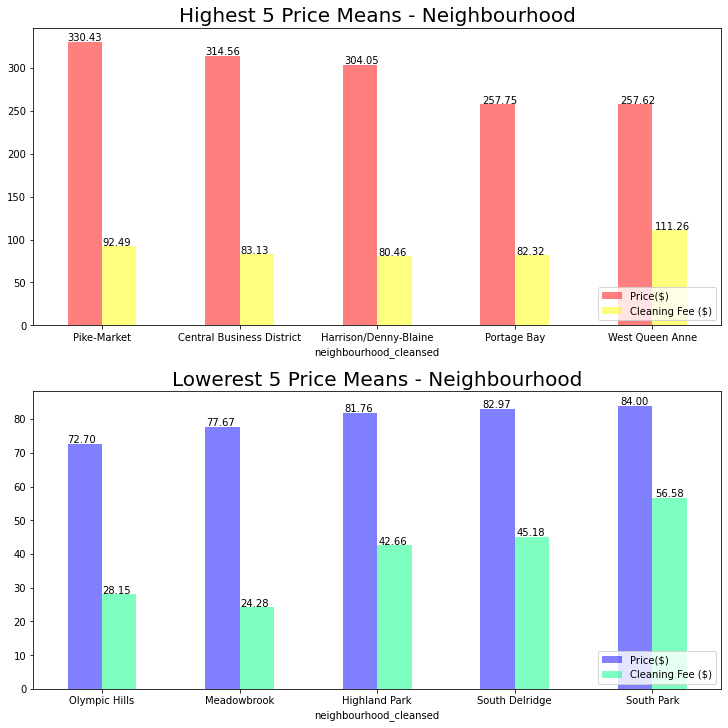

In [38]:
# Plotting Higher and Lower Mean Prices
plot_head_tail_prices(mean_price, m_type='mean', column_name='neighbourhood_cleansed');

In [39]:
# Mean and Median of Room Types without outliers (simple way)
room_mean_price, room_median_price = mean_median_grouped_price(listings_neighbourhood, column_name='room_type',outlier=True)

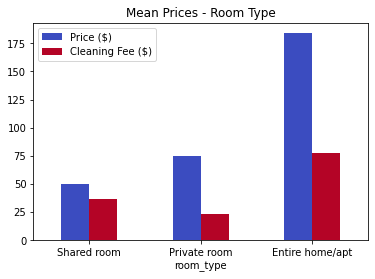

In [40]:
# Plot room_type mean price
room_mean_price.plot(kind = 'bar', title="Mean Prices - Room Type", cmap='coolwarm', rot=0).legend(['Price ($)', 'Cleaning Fee ($)']);

## 2. What type of property has the best prices ?

### Property Type Mean Prices

<ipython-input-41-ae0be4529d75>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = df.groupby(df[col])['cleaning_fee','price'].mean().sort_values(by = 'price', ascending=False).plot(kind='bar',


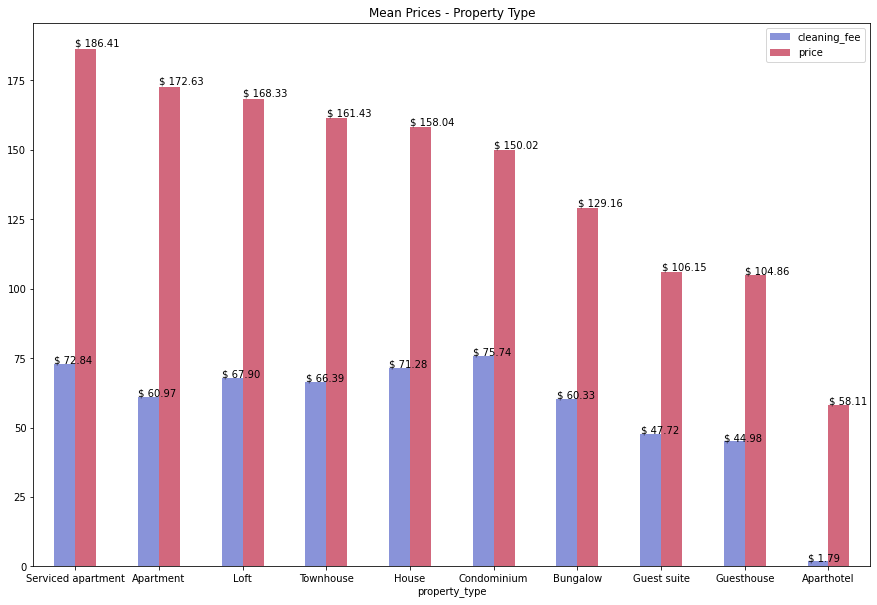

In [41]:
def plot_mean (col, df):
    """
    input: column name and dataframe
    return: plot of grouped dataframe by the column name given
    """
    
    ax = df.groupby(df[col])['cleaning_fee','price'].mean().sort_values(by = 'price', ascending=False).plot(kind='bar', 
                                                                                                            figsize = (15,10), 
                                                                                                            cmap='coolwarm', 
                                                                                                            alpha=0.6, 
                                                                                                            rot=0, 
                                                                                                            title="Mean Prices - Property Type" );
    for p in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.annotate(f"$ {p.get_height():.2f}", (p.get_x() * 1.001, p.get_height() * 1.005), fontsize=10)
    fig = ax.get_figure()
    fig.savefig("property1.png", dpi=150)

# Ploting Property Types Means
plot_mean('property_type', listings_neighbourhood)

## 3. What to expect in terms of cleaning fee and how much it increases the price on average?

### Cleaning Fee by Property Types

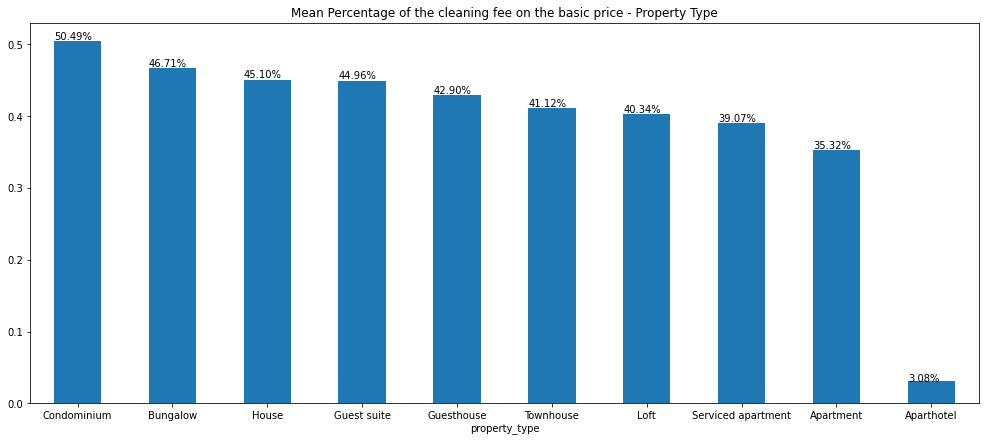

In [48]:
# Setting cleaning fee percentage over the price
#listings_neighbourhood_2['perc_cleaning_fee'] = listings_neighbourhood['cleaning_fee'] / listings_neighbourhood['price']

fee_perc_price = pd.DataFrame()
fee_perc_price['cleaning_fee'] = listings_neighbourhood.groupby(listings_neighbourhood['property_type'])['cleaning_fee'].mean()
fee_perc_price['price'] = listings_neighbourhood.groupby(listings_neighbourhood['property_type'])['price'].mean()
fee_perc_price['perc_cleaning_fee'] = fee_perc_price['cleaning_fee'] / fee_perc_price['price']


# Plotting - Percentage of the cleaning fee on the basic price
ax = fee_perc_price['perc_cleaning_fee'].sort_values(ascending=False).plot(kind = 'bar',rot=0,figsize = (17,7), title="Mean Percentage of the cleaning fee on the basic price - Property Type")
for p in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.annotate(f"{p.get_height()*100:.2f}%", (p.get_x() * 1.001, p.get_height() * 1.005), fontsize=10)

In [49]:
# Show General "Cleaning Fee" Mean
print("General 'Cleaning Fee' Mean:")
print(f"{fee_perc_price['perc_cleaning_fee'].mean()*100:.2f}%")

General 'Cleaning Fee' Mean:
38.91%


## 4. When are high seasons and low seasons ?

#### Prices trend by the days

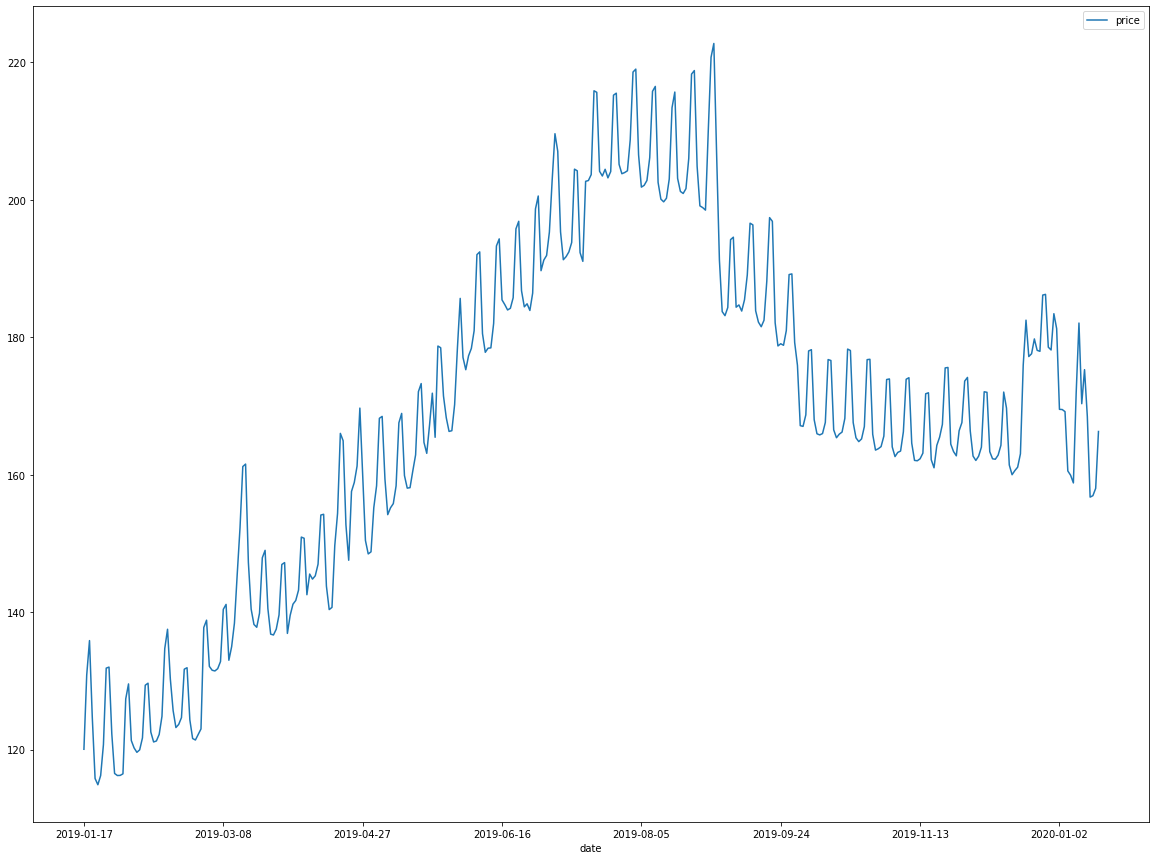

In [50]:
# group prices by date and take a mean to get around NaN values
day_price_mean = pd.DataFrame(calendar.query("available == True").groupby(['date']).mean()['price'])

day_price_mean.plot(kind = 'line',figsize = (20,15));

- The chart above show the prices over time, but it is a bit confused yet. Let's see it grouped by month.

### Price Trend Grouped by Month

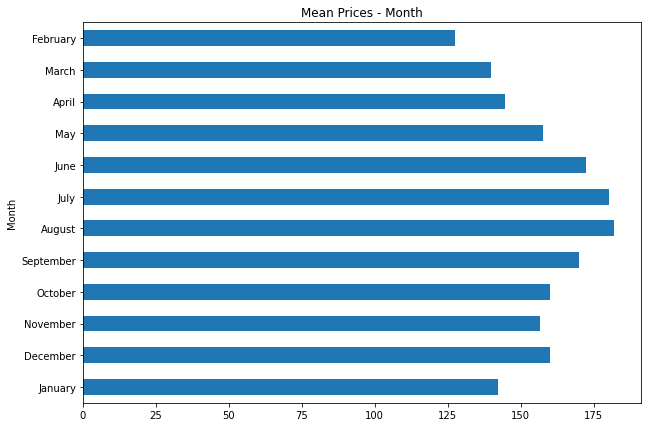

In [51]:
calendar['Month'] = pd.to_datetime(calendar['date'])
calendar = calendar.sort_values('Month', ascending=False)
month_mean = calendar.groupby(calendar['Month'].dt.strftime('%B'),
                                 sort=False)['price'].mean()

month = month_mean.plot(kind = 'barh' , figsize = (10,7), title="Mean Prices - Month");

The above chart shows: 

Higher prices
- June
- July
- August

Lower prices
- January
- February 
- March